# Data analysis and preparation

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [64]:
source = 'https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)'
tables = pd.read_html(source, thousands=".", decimal=",")
for i, table in enumerate(tables):
    print(f"\nTable {i}:")
    print(table.head())


Table 0:
                                                   0
0  Largest economies in the world by GDP (nominal...

Table 1:
                                                   0  \
0  > $20 trillion $10–20 trillion $5–10 trillion ...   

                                                   1  \
0  $750 billion – $1 trillion $500–750 billion $2...   

                                                   2  
0  $50–100 billion $25–50 billion $5–25 billion <...  

Table 2:
  Country/Territory   IMF[1][13]            World Bank[14]             \
  Country/Territory     Forecast       Year       Estimate       Year   
0             World  109,529,216       2024    105,435,540       2023   
1     United States   28,781,083       2024     27,360,935       2023   
2             China   18,532,633  [n 1]2024     17,794,782  [n 3]2023   
3           Germany    4,591,100       2024      4,456,081       2023   
4             Japan    4,110,452       2024      4,212,945       2023   

  United Nations

In [65]:
df = tables[2]
df.head()

Country/Territory   IMF[1][13]            World Bank[14]             \
  Country/Territory     Forecast       Year       Estimate       Year   
0             World  109,529,216       2024    105,435,540       2023   
1     United States   28,781,083       2024     27,360,935       2023   
2             China   18,532,633  [n 1]2024     17,794,782  [n 3]2023   
3           Germany    4,591,100       2024      4,456,081       2023   
4             Japan    4,110,452       2024      4,212,945       2023   

  United Nations[15]             
            Estimate       Year  
0        100,834,796       2022  
1         25,744,100       2022  
2         17,963,170  [n 1]2022  
3          4,076,923       2022  
4          4,232,173       2022

In [66]:
print(df.shape)
print(df.dtypes)

(210, 7)
Country/Territory   Country/Territory    object
IMF[1][13]          Forecast             object
                    Year                 object
World Bank[14]      Estimate             object
                    Year                 object
United Nations[15]  Estimate             object
                    Year                 object
dtype: object


In [67]:
df = df.replace(r'\[.*?\]', '', regex=True)
df.head(10)

Country/Territory   IMF[1][13]       World Bank[14]        \
  Country/Territory     Forecast  Year       Estimate  Year   
0             World  109,529,216  2024    105,435,540  2023   
1     United States   28,781,083  2024     27,360,935  2023   
2             China   18,532,633  2024     17,794,782  2023   
3           Germany    4,591,100  2024      4,456,081  2023   
4             Japan    4,110,452  2024      4,212,945  2023   
5             India    3,937,011  2024      3,549,919  2023   
6    United Kingdom    3,495,261  2024      3,340,032  2023   
7            France    3,130,014  2024      3,030,904  2023   
8            Brazil    2,331,391  2024      2,173,666  2023   
9             Italy    2,328,028  2024      2,254,851  2023   

  United Nations[15]        
            Estimate  Year  
0        100,834,796  2022  
1         25,744,100  2022  
2         17,963,170  2022  
3          4,076,923  2022  
4          4,232,173  2022  
5          3,465,541  2022  
6          3,089,072  2022  
7          2,775,316  2022  
8          1,920,095  2022  
9          2,046,952  2022

In [68]:
df = df.drop(df.columns[[2,4,6]], axis=1)
df.head()

,Country/Territory,IMF[1][13],World Bank[14],United Nations[15]
,Country/Territory,Forecast,Estimate,Estimate
0,World,"109,529,216","105,435,540","100,834,796"
1,United States,"28,781,083","27,360,935","25,744,100"
2,China,"18,532,633","17,794,782","17,963,170"
3,Germany,"4,591,100","4,456,081","4,076,923"
4,Japan,"4,110,452","4,212,945","4,232,173"


In [69]:
columns = ['country', 'imf_2024', 'world_bank_2023', 'united_nations_2022']
df.columns = columns
df.head()

,country,imf_2024,world_bank_2023,united_nations_2022
0,World,"109,529,216","105,435,540","100,834,796"
1,United States,"28,781,083","27,360,935","25,744,100"
2,China,"18,532,633","17,794,782","17,963,170"
3,Germany,"4,591,100","4,456,081","4,076,923"
4,Japan,"4,110,452","4,212,945","4,232,173"


In [70]:
# df = df.apply(lambda x: x.str.replace(',', '').astype(float) if x.dtype == 'object' and x.str.contains(r'^\d{1,3}(,\d{3})*$').any() else x)
# df['imf_2024'] = df['imf_2024'].str.replace(',', '').astype(float)
# df['world_bank_2023'] = df['world_bank_2023'].str.replace(',', '').astype(float)
# df['united_nations_2022'] = df['united_nations_2022'].str.replace(',', '').astype(float)
def clean_and_convert(value):
    if isinstance(value, str):
        try:
            return float(value.replace(',', ''))
        except ValueError:
            return value  # если не удалось преобразовать, возвращаем исходное значение
    return value

# Применение функции к каждому элементу DataFrame
df = df.applymap(clean_and_convert)

print(df.dtypes)
df.head()

country                object
imf_2024               object
world_bank_2023        object
united_nations_2022    object
dtype: object


/var/folders/zb/nl25s0l50sl0r6n18b3fm3w00000gp/T/ipykernel_75228/416297878.py:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(clean_and_convert)


,country,imf_2024,world_bank_2023,united_nations_2022
0,World,109529216.0,105435540.0,100834796.0
1,United States,28781083.0,27360935.0,25744100.0
2,China,18532633.0,17794782.0,17963170.0
3,Germany,4591100.0,4456081.0,4076923.0
4,Japan,4110452.0,4212945.0,4232173.0


In [75]:
df = df.replace('—', np.nan)
# df = df.replace({'—': np.NaN})


/var/folders/zb/nl25s0l50sl0r6n18b3fm3w00000gp/T/ipykernel_75228/2856885570.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('—', np.nan)


In [76]:
print(df.isnull().sum())
print(df.dtypes)

country                 0
imf_2024               15
world_bank_2023         8
united_nations_2022     1
dtype: int64
country                 object
imf_2024               float64
world_bank_2023        float64
united_nations_2022    float64
dtype: object


In [77]:
df.loc[df['country'] == 'Taiwan']

,country,imf_2024,world_bank_2023,united_nations_2022
22,Taiwan,802.958,NaN,NaN


In [53]:
missing_values = df[df['united_nations_2022'].isnull()]

print(missing_values)

Empty DataFrame
Columns: [country, imf_2024, world_bank_2023, united_nations_2022]
Index: []


In [78]:
#Замініть відсутні дані в стовпцях середніми значеннями цих стовпців (метод fillna)
# df = df.fillna(df.mean(numeric_only=True), axis=0)
df.imf_2024 = df.imf_2024.fillna(df.imf_2024.mean())
df.world_bank_2023 = df.world_bank_2023.fillna(df.world_bank_2023.mean())
df.united_nations_2022 = df.united_nations_2022.fillna(df.united_nations_2022.mean())
print(df.isnull().sum())

country                0
imf_2024               0
world_bank_2023        0
united_nations_2022    0
dtype: int64


In [112]:
df_without_country = df.drop(columns=['country'])

# Вычисляем корреляцию
correlation_matrix = df_without_country.corr()

# Выводим результат
print(correlation_matrix)

                     imf_2024  world_bank_2023  united_nations_2022
imf_2024             1.000000         0.999425             0.999285
world_bank_2023      0.999425         1.000000             0.999643
united_nations_2022  0.999285         0.999643             1.000000


# Building a model and choosing the best one

In [128]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import classification_report, accuracy_score, mean_squared_error, r2_score, confusion_matrix
from scipy.stats import skew, kurtosis, iqr
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.neural_network import MLPRegressor

In [84]:
features = ['imf_2024', 'world_bank_2023', 'united_nations_2022']


### Divide the dataset into test and train sets

In [114]:
X = df[['world_bank_2023', 'united_nations_2022']]
y = df['imf_2024']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Data scaling

In [115]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Linear regression

In [117]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear regression - MSE: {mse_lr}, R2: {r2_lr}")

Linear regression - MSE: 62948591392.167496, R2: 0.7640481589558779


### SVC

In [121]:
svm_model = SVR()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
mse_svm = mean_squared_error(y_test, y_pred_svm)
r2_svm = r2_score(y_test, y_pred_svm)

print(f"SVM - MSE: {mse_svm}, R2: {r2_svm}")

SVM - MSE: 299312851744.9338, R2: -0.12192214083714958


### Random forest

In [129]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest - MSE: {mse_rf}, R2: {r2_rf}")

Random Forest - MSE: 106519445417.20459, R2: 0.6007303944800331


### Gradient Boosting

In [131]:
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f"Gradient Boosting - MSE: {mse_gb}, R2: {r2_gb}")

Gradient Boosting - MSE: 97006785048.24911, R2: 0.63638694655916


### Neural networks

In [132]:

nn_model = MLPRegressor(random_state=42, max_iter=1000)
nn_model.fit(X_train, y_train)
y_pred_nn = nn_model.predict(X_test)
mse_nn = mean_squared_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)

print(f"Neural networks - MSE: {mse_nn}, R2: {r2_nn}")

Neural networks - MSE: 299288556460.5208, R2: -0.12183107419119055


/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [139]:
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Support Vector Regressor': SVR(),
    'Neural networks': MLPRegressor(random_state=42, max_iter=1000)
}

# Обучение и оценка моделей
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append({'Model': name, 'MSE': mse, 'R^2': r2})

# Вывод результатов
results_df = pd.DataFrame(results)
print(results_df)

                      Model           MSE       R^2
0         Linear Regression  6.294859e+10  0.764048
1             Random Forest  1.065194e+11  0.600730
2         Gradient Boosting  9.700679e+10  0.636387
3  Support Vector Regressor  2.993129e+11 -0.121922
4           Neural networks  2.992886e+11 -0.121831


/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


# Visualization of results

/var/folders/zb/nl25s0l50sl0r6n18b3fm3w00000gp/T/ipykernel_75228/1825966757.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='MSE', data=results_df, ax=ax1, palette='viridis')
/var/folders/zb/nl25s0l50sl0r6n18b3fm3w00000gp/T/ipykernel_75228/1825966757.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='R^2', data=results_df, ax=ax2, palette='viridis')


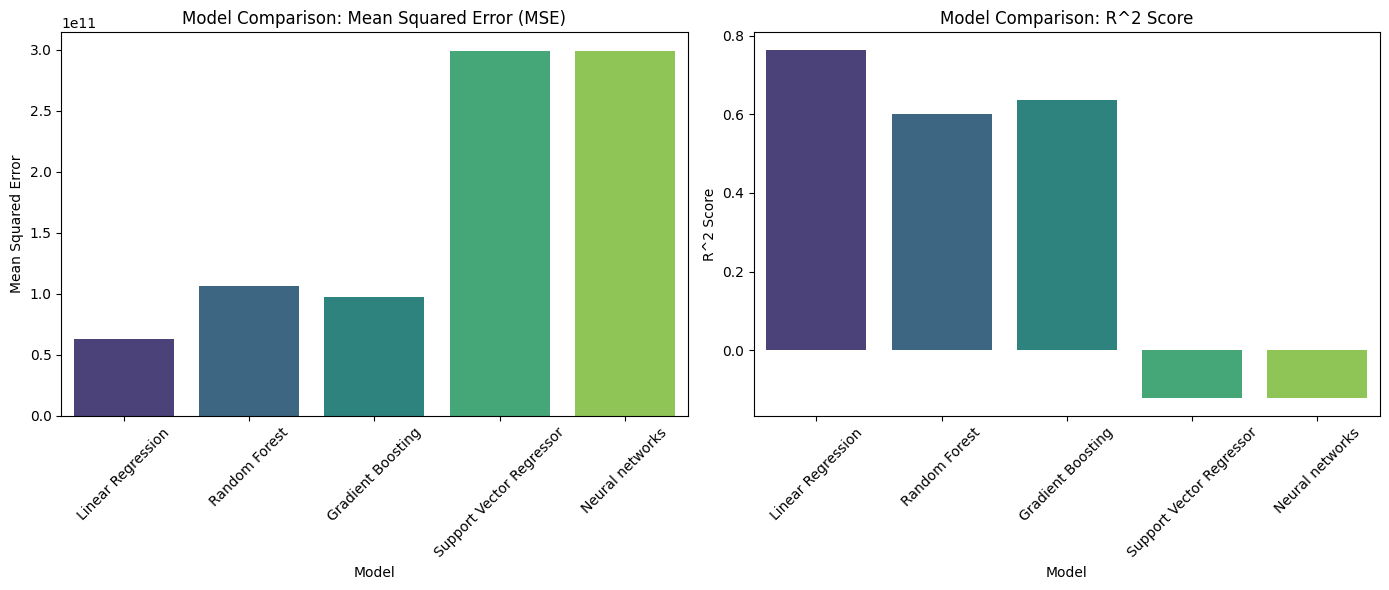

In [146]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6))
sns.barplot(x='Model', y='MSE', data=results_df, ax=ax1, palette='viridis')
ax1.set_title('Model Comparison: Mean Squared Error (MSE)')
ax1.set_ylabel('Mean Squared Error')
ax1.set_xlabel('Model')
ax1.tick_params(axis='x', rotation=45)

sns.barplot(x='Model', y='R^2', data=results_df, ax=ax2, palette='viridis')
ax2.set_title('Model Comparison: R^2 Score')
ax2.set_ylabel('R^2 Score')
ax2.set_xlabel('Model')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Conclusion

### Based on the obtained results:

- **Mean Squared Error (MSE) Indicators**:
    - The lowest values are for the models Linear Regression, Gradient Boosting, and Random Forest.
    - The highest values are for the models Support Vector Regressor (SVR) and Neural Networks.

- **R² Indicators**:
    - The highest values are for the models Linear Regression, Gradient Boosting, and Random Forest.
    - The lowest values are for the models Support Vector Regressor (SVR) and Neural Networks.

From this, we can conclude that the best model is Linear Regression. Close behind are the models Gradient Boosting and Random Forest. The worst results were shown by the models Support Vector Regressor (SVR) and Neural Networks.


### Українською
### Виходячи з отриманих результатів:

- **Показники Mean Squared Error (MSE)**:
    - Найменші значення у моделей Linear Regression, Gradient Boosting та Random Forest.
    - Найвищі значення у моделей Support Vector Regressor (SVR) та Neural Networks.

- **Показники R²**:
    - Найвищі значення у моделей Linear Regression, Gradient Boosting та Random Forest.
    - Найменші значення у моделей Support Vector Regressor (SVR) та Neural Networks.

З цього можна зробити висновок, що найкращою моделлю є Linear Regression. З невеликим відривом за нею йдуть моделі Gradient Boosting та Random Forest. Найгірші результати показали моделі Support Vector Regressor (SVR) та Neural Networks.